###Assignment 8: Navigation with Multiple Goals

Objective: Solve a problem where multiple goals exist using search algorithms.

Problem Statement: A robot in a grid needs to collect items (goals) before reaching an exit. Each goal has a different priority or cost.

Tasks:
* Use BFS/DFS for simpler scenarios (unweighted goals).
* Implement A* or Uniform Cost Search for weighted scenarios.
* Analyze the trade-offs between path length and goal priority.

BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (6, 8), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (3, 6), (2, 6), (2, 7), (2, 8), (2, 9), (1, 9), (0, 9)] Cost: 29
UCS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (6, 8), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6), (0, 7), (0, 8), (0, 9)] Cost: 32
A* Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 9), (6, 9), (6, 8), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (3, 6), (2, 6), (1, 6), (0, 6), (0, 7), (0, 8), (0, 9)] Cost: 32


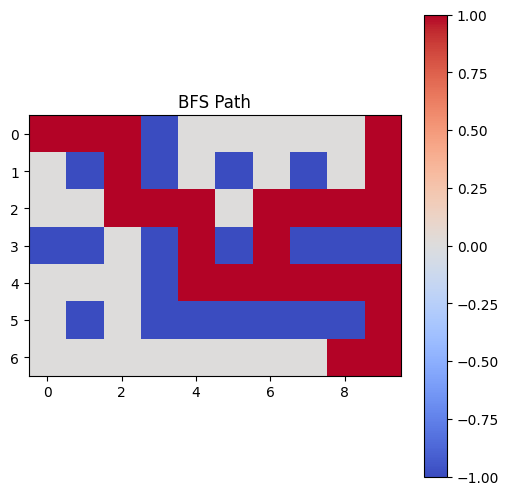

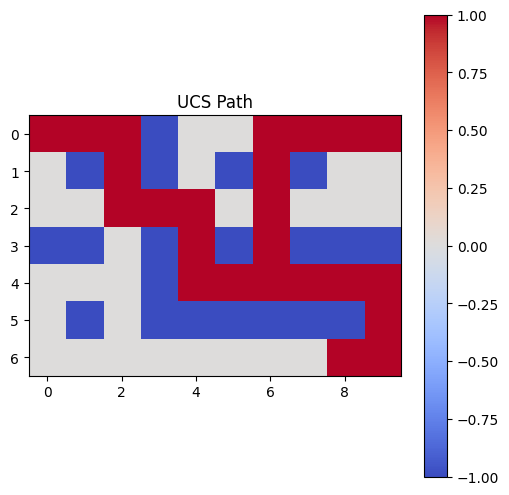

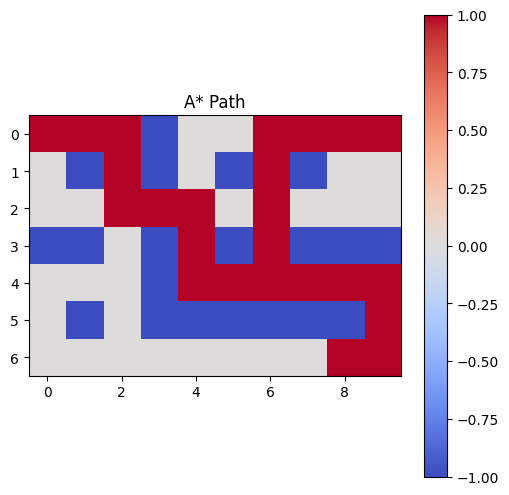

In [ ]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import numpy as np

def get_neighbors(grid, pos):
    rows, cols = len(grid), len(grid[0])
    x, y = pos
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    neighbors = []
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols and grid[nx][ny] != '#':
            neighbors.append((nx, ny))
    return neighbors

def bfs(grid, start, goals, exit):
    queue = deque([(start, [], 0, set())])
    visited = set()

    while queue:
        pos, path, cost, collected_goals = queue.popleft()
        if (pos, frozenset(collected_goals)) in visited:
            continue
        visited.add((pos, frozenset(collected_goals)))
        new_path = path + [pos]
        new_collected_goals = collected_goals | ({pos} if pos in goals else set())

        if pos == exit and new_collected_goals == set(goals.keys()):
            return new_path, cost

        for neighbor in get_neighbors(grid, pos):
            queue.append((neighbor, new_path, cost + 1, new_collected_goals))

    return None, float('inf')

def ucs(grid, start, goals, exit):
    pq = [(0, start, [], set())]
    visited = {}

    while pq:
        cost, pos, path, collected_goals = heapq.heappop(pq)

        if (pos, frozenset(collected_goals)) in visited and visited[(pos, frozenset(collected_goals))] <= cost:
            continue
        visited[(pos, frozenset(collected_goals))] = cost
        new_path = path + [pos]
        new_collected_goals = collected_goals | ({pos} if pos in goals else set())

        if pos == exit and new_collected_goals == set(goals.keys()):
            return new_path, cost

        for neighbor in get_neighbors(grid, pos):
            new_cost = cost + goals.get(neighbor, 1)
            heapq.heappush(pq, (new_cost, neighbor, new_path, new_collected_goals))

    return None, float('inf')

def a_star(grid, start, goals, exit):
    def heuristic(pos):
        return abs(pos[0] - exit[0]) + abs(pos[1] - exit[1])

    pq = [(0 + heuristic(start), 0, start, [], set())]
    visited = {}

    while pq:
        _, cost, pos, path, collected_goals = heapq.heappop(pq)

        if (pos, frozenset(collected_goals)) in visited and visited[(pos, frozenset(collected_goals))] <= cost:
            continue
        visited[(pos, frozenset(collected_goals))] = cost
        new_path = path + [pos]
        new_collected_goals = collected_goals | ({pos} if pos in goals else set())

        if pos == exit and new_collected_goals == set(goals.keys()):
            return new_path, cost

        for neighbor in get_neighbors(grid, pos):
            new_cost = cost + goals.get(neighbor, 1)
            f = new_cost + heuristic(neighbor)
            heapq.heappush(pq, (f, new_cost, neighbor, new_path, new_collected_goals))

    return None, float('inf')

def plot_grid(grid, path, title):
    rows, cols = len(grid), len(grid[0])
    grid_array = np.zeros((rows, cols))

    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == '#':
                grid_array[i, j] = -1
            elif grid[i][j] == 'S':
                grid_array[i, j] = 2
            elif grid[i][j] == 'E':
                grid_array[i, j] = 3

    for x, y in path:
        grid_array[x, y] = 1

    plt.figure(figsize=(6, 6))
    plt.imshow(grid_array, cmap='coolwarm', origin='upper')
    plt.colorbar()
    plt.title(title)
    plt.show()

grid = [
    ['S', '.', '.', '#', '.', '.', '.', '.', '.', 'E'],
    ['.', '#', '.', '#', '.', '#', '.', '#', '.', '.'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
    ['#', '#', '.', '#', '.', '#', '.', '#', '#', '#'],
    ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.'],
    ['.', '#', '.', '#', '#', '#', '#', '#', '#', '.'],
    ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
]
start = (0, 0)
exit = (0, 9)
goals = {(2, 2): 2, (4, 5): 3, (6, 8): 1}

bfs_path, bfs_cost = bfs(grid, start, goals, exit)
ucs_path, ucs_cost = ucs(grid, start, goals, exit)
a_star_path, a_star_cost = a_star(grid, start, goals, exit)

print("BFS Path:", bfs_path, "Cost:", bfs_cost)
print("UCS Path:", ucs_path, "Cost:", ucs_cost)
print("A* Path:", a_star_path, "Cost:", a_star_cost)

if bfs_path:
    plot_grid(grid, bfs_path, "BFS Path")
if ucs_path:
    plot_grid(grid, ucs_path, "UCS Path")
if a_star_path:
    plot_grid(grid, a_star_path, "A* Path")